# Sect 24: Regularization

- online-ds-pt-041320
- 08/27/2020

## Questions

- What is the difference between fit_transform and transform in StandardScaler()?

- What is happening exactly with “train_test_split”??

- [Can we go over this lab? - Ridge and Lasso Regression](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-24-feature-selection-ridge-and-lasso/ridge-and-lasso-regression-lab)


- [Can we go over the feature selection methodology towards the end?](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-24-feature-selection-ridge-and-lasso/feature-selection-methods)



## Objectives

**DISCUSSION:**
- Discuss Regularization Techniques
    - Ridge Regression (L2 normalization)
    - Lasso Regression (L1 normalization)
- AIC/BIC
- Compare Feature Selection methods

**APPLICATION:**
- Practice turning repetitive code into flexible functions/loops


# Regularization techniques

We can "shrink down" prediction variables effects instead of deleting/zeroing them

## Linear Regression Cost Function Previously Used (RSS)

### Previously, we've used Residual Sum of Squares (RSS) as our cost function.

$$ \large \text{RSS}= \sum_{i=1}^n(y_i - \hat{y})^2  $$

### When we substituted $mx+b$ for $\hat{y}$ 

##### For a single predictor (X)
$$ \large \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - (mx_i + b))^2$$


- #####  For multiple predictors, the equation becomes:
$$ \large \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} ) -b )^2$$
- where $k$ is the number of predictors
- and $j$ is each individual predictor.

# Penalized Estimation

> ***The number of predictors in our models, the higher the chance of overfitting.***  

> Now, **instead of completely "deleting"** certain predictors from a model ***(which is equal to setting coefficients equal to zero)*** we can **reduce the values of the coefficients** to make them less sensitive to noise in the data. 

> This is called **penalized estimation**.

## Ridge and Lasso regression

> Lasso and Ridge are two commonly used so-called **regularization techniques**. (Regularization = when one tries to battle overfitting.)

> Achieved by modifying the RSS cost/loss function that our regression model uses to determine the coefficients.


- Advantages of Ridge/Lasso
    - They reduce model complexity
    - The may prevent from overfitting
    - Some of them may perform variable selection at the same time (when coefficients are set to 0)
    - They can be used to counter multicollinearity


## Ridge Regression - L2 Norm Regularization

- **Error term added to cost function** 
    - $\large ...  +   \lambda \sum_{i=1}^n m_i^2$
    - Notice that  $m_i^2$ is squared, hence "L***2*** norm regularization"

Define a penalty ***hyperparameter*** $\lambda$ for extra terms (large $m$)

<!-- $$ =\sum_{i=1}^n(y_i - \hat{y})^2= \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{i=1}^n m_i^2$$/-->

$$\large J_{\text{ridge}}=\sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2$$

- **By adding the penalty term $\lambda$, ridge regression puts a constraint on the coefficients $m$.**
- Therefore, large coefficients will penalize the optimization function. 
    - This shrinks the coefficients and helps to reduce model complexity and multicollinearity.

- With two predictors there is a penalty term m for each predictor.
$$\large J_\text{ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$\large  \sum_{i=1}^n(y_i - ((m_1x_{1i})-b)^2 + \lambda m_1^2 + (m_2x_{2i})-b)^2 + \lambda m_2^2)$$

### Uses

> - Used mostly to prevent overfitting (but since includes all features it can be computationally expensive (for many variables))

## Lasso Regression - L1 Norm Regularization

"Least Absolute Shrinkage and Selection Operator"

- **Error term added to cost function** 
    - $ \large ... + \lambda \sum_{j=1}^p \mid m_j \mid$
    - Notice that  $m$ has no exponent (meaning its actually $m^1$, hence "L***1*** norm regularization"



$$\large J_\text{lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

If you have two predictors the full equation would look like this (notice that there is a penalty term `m` for each predictor in the model - in this case, two): 
$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$\sum_{i=1}^n(y_i - ((m_1x_{1i})-b)^2 + \lambda \mid m_1 \mid) + ((m_2x_{2i})-b)^2 + \lambda \mid m_2 \mid) $$

### Uses

> - Lasso also helps with over fitting 
- **Lasso shrinks the less important features' coefficients to zero**, removing them altogether. 
    - Therefore, Lasso regression can be used for **feature selection**

### Using Regularization

- ***Make sure to standardize the data before performing ridge or lasso regression***, otherwise features with large values/units will be unfairly penalized.
- **Fit-transform the training data, only transform the test data**

```python
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
```

## Ridge & Lasson Regression Summary:

In Ridge regression, the cost function is changed by adding a penalty term to the square of the magnitude of the coefficients.

$$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2$$

Lasso regression is very similar to Ridge regression, except that the magnitude of the coefficients are not squared in the penalty term.

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$


## Applying Ridge and Lasso Regression with Scikit-Learn

In [45]:
# !pip install -U fsds
from fsds.imports import *
import warnings
# warnings.filterwarnings('ignore')

# plt.style.use('seaborn-poster')

In [46]:
df = fs.datasets.load_mod1_proj(read_csv_kwds=dict(verbose=False,
                                                  na_values='?',
                                                  index_col='id'))
df.drop(columns=['date'],inplace=True)
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64

None

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [47]:
y = df['price'].copy()
X = df.drop('price',axis=1).copy()
X.isna().sum()

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train.shape, X_test.shape

((16197, 18), (5400, 18))

#### `def remake_df`

In [49]:
def remake_df(array,df):
    return pd.DataFrame(array, columns=df.columns, index=df.index)

### Preprocessing

#### FIlling Null Values

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

imputer = SimpleImputer(strategy='median')
X_train_cln = remake_df(imputer.fit_transform(X_train), X_train)
X_test_cln = remake_df(imputer.transform(X_test),X_test)
X_train_cln.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
1972200847,3.0,2.50,1730.0,1301.0,3.0,0.0,0.0,3.0,9.0,1730.0,0.0,2011.0,0.0,98103.0,47.6530,-122.352,1330.0,1240.0
8731980040,3.0,2.25,1980.0,8000.0,1.0,0.0,0.0,4.0,9.0,1560.0,420.0,1974.0,0.0,98023.0,47.3149,-122.378,2360.0,8000.0
2767603165,4.0,2.00,1980.0,4500.0,2.0,0.0,0.0,4.0,7.0,1980.0,0.0,1910.0,0.0,98107.0,47.6728,-122.379,1550.0,2541.0
8029770410,4.0,2.50,3160.0,8530.0,2.0,0.0,0.0,3.0,9.0,3160.0,0.0,2006.0,0.0,98059.0,47.5075,-122.148,3160.0,6460.0
4435000705,3.0,1.00,1350.0,8700.0,1.5,0.0,0.0,3.0,6.0,1350.0,0.0,1942.0,0.0,98188.0,47.4497,-122.289,1300.0,8700.0


In [51]:
print('Total X_train Nulls:')
print(X_train_cln.isna().sum().sum())
print('Total X_test Nulls:')
print(X_test_cln.isna().sum().sum())

Total X_train Nulls:
0
Total X_test Nulls:
0


#### Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [53]:
scaler = RobustScaler()
X_train_sca = remake_df(scaler.fit_transform(X_train_cln), X_train_cln)
X_test_sca = remake_df(scaler.transform(X_test_cln), X_test_cln)


display(X_train_cln.describe().round(2),X_train_sca.describe().round(2))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00
mean,3.37,2.12,2082.99,15052.36,1.50,0.01,0.23,3.41,7.66,1789.63,286.88,1971.15,69.26,98077.70,47.56,-122.21,1988.43,12662.11
std,0.94,0.77,919.59,40216.52,0.54,0.08,0.77,0.65,1.17,829.79,440.39,29.35,365.31,53.58,0.14,0.14,688.35,26478.91
min,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,660.00
25%,3.00,1.75,1430.00,5034.00,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1952.00,0.00,98033.00,47.47,-122.33,1480.00,5100.00
50%,3.00,2.25,1920.00,7639.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,4.00,2.50,2550.00,10626.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10058.00
max,33.00,8.00,12050.00,1164794.00,3.50,1.00,4.00,5.00,13.00,8860.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6110.00,858132.00


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00,16197.00
mean,0.37,-0.17,0.15,1.33,-0.00,0.01,0.23,0.41,0.66,0.23,0.52,-0.09,69.26,0.15,-0.06,0.07,0.17,1.02
std,0.94,1.03,0.82,7.19,0.54,0.08,0.77,0.65,1.17,0.82,0.80,0.65,365.31,0.64,0.67,0.69,0.77,5.34
min,-2.00,-2.33,-1.38,-1.27,-0.50,0.00,0.00,-2.00,-4.00,-1.18,0.00,-1.67,0.00,-0.76,-2.02,-1.42,-1.62,-1.40
25%,0.00,-0.67,-0.44,-0.47,-0.50,0.00,0.00,0.00,0.00,-0.36,0.00,-0.51,0.00,-0.38,-0.49,-0.49,-0.40,-0.51
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.33,0.56,0.53,0.50,0.00,0.00,1.00,1.00,0.64,1.00,0.49,0.00,0.62,0.51,0.51,0.60,0.49
max,30.00,7.67,9.04,206.93,2.00,1.00,4.00,2.00,6.00,7.23,8.76,0.89,2015.00,1.60,1.00,4.48,4.80,171.54


### Linear Regression with sklearn

In [54]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, LinearRegression

from sklearn import metrics
linreg = LinearRegression()
linreg.fit(X_train_sca,y_train)

y_hat_train = linreg.predict(X_train_sca)
y_hat_test = linreg.predict(X_test_sca)

results = {'train-R2':metrics.r2_score(y_train, y_hat_train),
            'test-R2':metrics.r2_score(y_test, y_hat_test),
          'train-RMSE':np.sqrt(metrics.mean_squared_error(y_train,
                                                          y_hat_train)),
          'test-RMSE':np.sqrt(metrics.mean_squared_error(y_test,
                                                          y_hat_test))}
pd.Series(results)

train-R2           0.697611
test-R2            0.707013
train-RMSE    205523.475305
test-RMSE     188084.982077
dtype: float64

In [55]:
def fit_evaluate_model(model, X_train_sca,X_test_sca,y_train,y_test):
    model.fit(X_train_sca,y_train)

    y_hat_train = model.predict(X_train_sca)
    y_hat_test = model.predict(X_test_sca)

    results = {'train-R2':metrics.r2_score(y_train, y_hat_train),
                'test-R2':metrics.r2_score(y_test, y_hat_test),
              'train-RMSE':np.sqrt(metrics.mean_squared_error(y_train,
                                                              y_hat_train)),
              'test-RMSE':np.sqrt(metrics.mean_squared_error(y_test,
                                                              y_hat_test))}
    display(pd.Series(results))
    return model

linreg = fit_evaluate_model(LinearRegression(),X_train_sca,X_test_sca,y_train,y_test)
linreg

train-R2           0.697611
test-R2            0.707013
train-RMSE    205523.475305
test-RMSE     188084.982077
dtype: float64

LinearRegression()

In [56]:
## Pull out coeffs
res_df = pd.DataFrame(linreg.coef_,index=X_train_sca.columns,columns=['Coeffs'])
res_df.loc['Intercept'] = linreg.intercept_
res_df

,Coeffs
bedrooms,-36467.259301
bathrooms,32976.555246
sqft_living,109253.570774
sqft_lot,65.855474
floors,3368.163384
waterfront,607377.630551
view,51990.601828
condition,27183.750236
grade,95663.288130
sqft_above,93996.665698


#### Compare to Statsmodels OLS

In [57]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train_sca)
X_test_ols = sm.add_constant(X_test_sca)
ols = sm.OLS(y_train,X_train_ols).fit()
display(ols.summary())
ols.params
# fig = sm.graphics.qqplot(model.resid,fit=True,line='45')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2073.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:07:07   Log-Likelihood:            -2.2113e+05
No. Observations:               16197   AIC:                         4.423e+05
Df Residuals:                   16178   BIC:                         4.424e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.203e+05   7650.858     54.938      0.000    4.05e+05    4.35e+05
bedrooms      -3.647e+04   2215.493    -16.460      0.000   -4.08e+04   -3.21e+04
bathrooms      3.298e+04   2874.888     11.471      0.000    2.73e+04    3.86e+04
sqft_living    1.093e+05   2.27e+04      4.806      0.000    6.47e+04    1.54e+05
sqft_lot         65.8555    314.586      0.209      0.834    -550.767     682.478
floors         3368.1634   4248.662      0.793      0.428   -4959.683    1.17e+04
waterfront     6.074e+05   2.08e+04     29.155      0.000    5.67e+05    6.48e+05
view           5.199e+04   2502.891     20.772      0.000    4.71e+04    5.69e+04
condition      2.718e+04   2775.328      9.795      0.000    2.17e+04    3.26e+04
grade          9.566e+04   2556.619     37.418      0.000    9.07e+04    1.01e+05
sqft_above       9.4e+04   2.05e+04      4.581      0.000    5.38e+04    1.34e+05
sqft_basement  3.358e+04   1.11e+04      3.035      0.002    1.19e+04    5.53e+04
yr_built      -1.197e+05   3832.187    -31.225      0.000   -1.27e+05   -1.12e+05
yr_renovated     23.0410      4.685      4.918      0.000      13.859      32.223
zipcode       -5.107e+04   3257.804    -15.677      0.000   -5.75e+04   -4.47e+04
lat            1.231e+05   2615.820     47.071      0.000    1.18e+05    1.28e+05
long          -4.706e+04   3170.728    -14.842      0.000   -5.33e+04   -4.08e+04
sqft_living15  1.583e+04   3623.021      4.369      0.000    8728.936    2.29e+04
sqft_lot15    -1662.8687    426.972     -3.895      0.000   -2499.781    -825.956
==============================================================================
Omnibus:                    14394.411   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1623766.776
Skew:                           3.801   Prob(JB):                         0.00
Kurtosis:                      51.459   Cond. No.                     7.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

const            420324.324402
bedrooms         -36467.259301
bathrooms         32976.555246
sqft_living      109253.570774
sqft_lot             65.855474
floors             3368.163384
waterfront       607377.630551
view              51990.601828
condition         27183.750236
grade             95663.288130
sqft_above        93996.665698
sqft_basement     33575.743834
yr_built        -119660.367156
yr_renovated         23.040955
zipcode          -51072.970083
lat              123129.695515
long             -47061.069907
sqft_living15     15830.458745
sqft_lot15        -1662.868712
dtype: float64

In [58]:
def get_model_coeffs(X_df, sklearn_model=None, ols_model = None):
    
    coeffs_df = pd.DataFrame()
    
    if sklearn_model is not None:

        coeffs = dict(zip(X_df.columns,sklearn_model.coef_))
        coeffs['const'] = sklearn_model.intercept_

        coeffs_df = pd.DataFrame(coeffs,index=['sklearn']).T

    if ols_model is not None:
        coeffs_df = coeffs_df.join(ols_model.params.rename('statsmodels'))
        coeffs_df = coeffs_df.join(ols_model.pvalues.rename('p-values').round(4))
        
    return coeffs_df

In [59]:
coeffs_df = get_model_coeffs(X_train_cln,linreg,ols)
coeffs_df.style.background_gradient(subset=['p-values'])

,sklearn,statsmodels,p-values
bedrooms,-36467.259301,-36467.259301,0.000000
bathrooms,32976.555246,32976.555246,0.000000
sqft_living,109253.570774,109253.570774,0.000000
sqft_lot,65.855474,65.855474,0.834200
floors,3368.163384,3368.163384,0.427900
waterfront,607377.630551,607377.630551,0.000000
view,51990.601828,51990.601828,0.000000
condition,27183.750236,27183.750236,0.000000
grade,95663.288130,95663.288130,0.000000
sqft_above,93996.665698,93996.665698,0.000000


### Using Lasso Regression for Feature Selection

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV,Lasso
# lassocv =LassoCV()

lasso_cv = fit_evaluate_model(LassoCV(),X_train_sca,X_test_sca,y_train,y_test)
res_df = get_model_coeffs(X_train_sca,lasso_cv)
res_df = res_df.round(2)
res_df

train-R2           0.648688
test-R2            0.668293
train-RMSE    221526.206840
test-RMSE     200127.824527
dtype: float64

,sklearn
bedrooms,-0.00
bathrooms,0.00
sqft_living,175947.06
sqft_lot,-0.00
floors,0.00
waterfront,0.00
view,63492.23
condition,1097.08
grade,104372.83
sqft_above,0.00


In [61]:
removed_coeffs = list(res_df[res_df['sklearn']==0].index)
removed_coeffs

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'long',
 'sqft_living15']

In [62]:
X_train_ols.drop(columns=removed_coeffs,inplace=True)
X_test_ols.drop(columns=removed_coeffs,inplace=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     4044.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:07:07   Log-Likelihood:            -2.2192e+05
No. Observations:               16197   AIC:                         4.439e+05
Df Residuals:                   16188   BIC:                         4.439e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.044e+05   2515.901    160.740      0.000    3.99e+05    4.09e+05
sqft_living   1.998e+05   3275.957     60.976      0.000    1.93e+05    2.06e+05
view              8e+04   2357.074     33.942      0.000    7.54e+04    8.46e+04
condition      2.87e+04   2848.506     10.076      0.000    2.31e+04    3.43e+04
grade         1.129e+05   2438.927     46.298      0.000    1.08e+05    1.18e+05
yr_built     -1.021e+05   3348.432    -30.482      0.000   -1.09e+05   -9.55e+04
yr_renovated    37.6067      4.850      7.753      0.000      28.099      47.114
lat           1.154e+05   2643.336     43.651      0.000     1.1e+05    1.21e+05
sqft_lot15   -1784.3341    325.025     -5.490      0.000   -2421.419   -1147.249
==============================================================================
Omnibus:                    15463.876   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1975485.632
Skew:                           4.260   Prob(JB):                         0.00
Kurtosis:                      56.428   Cond. No.                         908.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

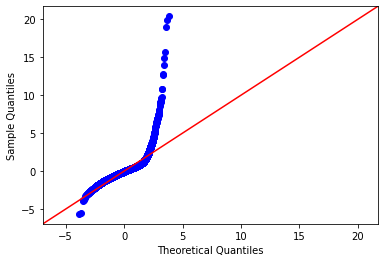

In [63]:
model = sm.OLS(y_train, X_train_ols).fit()
display(model.summary())
fig = sm.graphics.qqplot(model.resid,fit=True,line='45')

In [64]:
# lassocv.fit(X_train_sca,y_train)
# y_hat_train = lassocv.predict(X_train_sca)
# y_hat_test = lassocv.predict(X_test_sca)

### Exhibit A: The case for functions and dictionaries

- Code From [Ridge And Lasso Regression Lesson](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-24-feature-selection-ridge-and-lasso/ridge-and-lasso-regression)

- The following code is from the Learn.co lesson and its goal is to create,fit and evaluate 3 different models to compare the results.

In [65]:
y_train.shape, y_test.shape

((16197,), (5400,))

In [66]:
# Build a Ridge, Lasso and regular linear regression model  
# Note that in scikit-learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_sca, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_sca, y_train)

lin = LinearRegression()
lin.fit(X_train_sca, y_train)


# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_sca)
y_h_ridge_test = ridge.predict(X_test_sca)

y_h_lasso_train = np.reshape(lasso.predict(X_train_sca), y_train.shape)
y_h_lasso_test = np.reshape(lasso.predict(X_test_sca),  y_test.shape)

y_h_lin_train = lin.predict(X_train_sca)
y_h_lin_test = lin.predict(X_test_sca)


print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', 
      np.sum((y_train - lin.predict(X_train_sca))**2))
print('Test Error Unpenalized Linear Model', 
      np.sum((y_test - lin.predict(X_test_sca))**2))
print('\n'*3)
print('Ridge parameter coefficients:\n', ridge.coef_)
print('Lasso parameter coefficients:\n', lasso.coef_)
print('Linear model parameter coefficients:\n', lin.coef_)

Train Error Ridge Model 684160572397506.6
Test Error Ridge Model 191037421634241.0


Train Error Lasso Model 684159645158872.0
Test Error Lasso Model 191029874247614.2


Train Error Unpenalized Linear Model 684159642508145.6
Test Error Unpenalized Linear Model 191030186606736.75




Ridge parameter coefficients:
 [-3.64786523e+04  3.29736409e+04  1.09192194e+05  6.54357495e+01
  3.36674111e+03  6.04293643e+05  5.21225315e+04  2.71933056e+04
  9.56532283e+04  9.40758267e+04  3.36076203e+04 -1.19638660e+05
  2.30863725e+01 -5.10667097e+04  1.23116744e+05 -4.70664305e+04
  1.58184685e+04 -1.66218377e+03]
Lasso parameter coefficients:
 [-3.64664652e+04  3.29736976e+04  1.09405059e+05  6.58428424e+01
  3.36753174e+03  6.07300107e+05  5.19933451e+04  2.71824993e+04
  9.56646853e+04  9.38608478e+04  3.35028131e+04 -1.19657592e+05
  2.30425758e+01 -5.10698600e+04  1.23128012e+05 -4.70583690e+04
  1.58279346e+04 -1.66287700e+03]
Linear model parameter coefficients:
 [-3.64672593e+04  3.29765552

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015634814617.375, tolerance: 226251545093.74475



### Q1: What are the issues/limitations of the way we tested/compared the 3 different types of models? 
-  A: If we wanted to add another model type, we'd have to copy a lot and edit a lot.

### Q2: What other limitation does the above code have? (what is inflexible?)

- A: hard coded values for data shapes

### Whats the solution? 
- Functions and dictionaries!

In [67]:
from sklearn.metrics import r2_score, mean_squared_error
def make_model(model, X_train , X_test, y_train, y_test ):
    """Takes a sklearn model and train/test data to fit model, 
    get R2 and RMSE for both the training and test data.
    
    Returns:
        DataFrame: results as a df
        model: fit scikit-learn model itself"""
    
    res= [['Data','R2','RMSE']]
    model.fit(X_train, y_train)
    # Generate preditions for training and test sets
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    r2_train = r2_score(y_train,y_hat_train)
    r2_test = r2_score(y_test,y_hat_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_hat_test))
    res.append(['Train', r2_train, rmse_train] )
    res.append(['Test', r2_test, rmse_test] )
    
    res_df = pd.DataFrame(res[1:], columns=res[0]).round(4)
    
    return res_df, model
    

In [68]:
## Test our function
df_res, model = make_model(LinearRegression(),
                           X_train_sca , X_test_sca, y_train, y_test  )
display(df_res.round(3))

,Data,R2,RMSE
0,Train,0.698,205523.475
1,Test,0.707,188084.982


In [69]:
## Use a dictionary to store our models
models_to_make = dict( linear=LinearRegression(),
                     ridge=Ridge(alpha=0.5),
                     lasso = Lasso(alpha=0.5))

In [70]:
## Test our dictionary and function together to make a linear regression.
models_to_make['linear']

LinearRegression()

In [71]:
models_to_make

{'linear': LinearRegression(),
 'ridge': Ridge(alpha=0.5),
 'lasso': Lasso(alpha=0.5)}

In [72]:
## Loop through models_to_make and save all results

## Create an empty list to store result dfs
results = []
## Create an empty dict to store fit models
fit_models={}

for model_type,mod in models_to_make.items():

    ## get model results and fit model using make_model
    res, mod = make_model(mod, X_train_sca , X_test_sca, y_train, y_test)
    ## Add model type as column to res
    res['Type'] = model_type
    
    # Display results
    display(res)
    
    ## Save fit model to models dict 
    fit_models[model_type] = mod
    ## Save df to list 
    results.append(res)
    
## Concatenate results 
df_res = pd.concat(results)
df_res.set_index(['Type',"Data"],inplace=True)
df_res

,Data,R2,RMSE,Type
0,Train,0.6976,205523.4753,linear
1,Test,0.7070,188084.9821,linear


,Data,R2,RMSE,Type
0,Train,0.6976,205523.6150,ridge
1,Test,0.7070,188088.5438,ridge


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015634814617.375, tolerance: 226251545093.74475



,Data,R2,RMSE,Type
0,Train,0.6976,205523.4757,lasso
1,Test,0.7070,188084.8283,lasso


R2         RMSE
Type   Data                      
linear Train  0.6976  205523.4753
       Test   0.7070  188084.9821
ridge  Train  0.6976  205523.6150
       Test   0.7070  188088.5438
lasso  Train  0.6976  205523.4757
       Test   0.7070  188084.8283

In [73]:
## Use styling to make it easier to find the best scores.
df_res.style.background_gradient(subset=['R2'])#.highlight_max('R2')

In [74]:
## Now examine the coefficients of one of the fit models
fit_models['lasso'].coef_.shape

(18,)

> #### Sidebar: You've heard of List Comprehensions but did you that there are Dictionary Comprehensions too?!

In [75]:
## Get the coefficients of every model in a dictionary using a dict comprehension
dict_comp= {k:mod.coef_ for k,mod in fit_models.items() }
dict_comp

{'linear': array([-3.64672593e+04,  3.29765552e+04,  1.09253571e+05,  6.58554735e+01,
         3.36816338e+03,  6.07377631e+05,  5.19906018e+04,  2.71837502e+04,
         9.56632881e+04,  9.39966657e+04,  3.35757438e+04, -1.19660367e+05,
         2.30409553e+01, -5.10729701e+04,  1.23129696e+05, -4.70610699e+04,
         1.58304587e+04, -1.66286871e+03]),
 'ridge': array([-3.64786523e+04,  3.29736409e+04,  1.09192194e+05,  6.54357495e+01,
         3.36674111e+03,  6.04293643e+05,  5.21225315e+04,  2.71933056e+04,
         9.56532283e+04,  9.40758267e+04,  3.36076203e+04, -1.19638660e+05,
         2.30863725e+01, -5.10667097e+04,  1.23116744e+05, -4.70664305e+04,
         1.58184685e+04, -1.66218377e+03]),
 'lasso': array([-3.64664652e+04,  3.29736976e+04,  1.09405059e+05,  6.58428424e+01,
         3.36753174e+03,  6.07300107e+05,  5.19933451e+04,  2.71824993e+04,
         9.56646853e+04,  9.38608478e+04,  3.35028131e+04, -1.19657592e+05,
         2.30425758e+01, -5.10698600e+04,  1.231

In [76]:
## Notice the shapes of the arrays are not the same
# Print out the shapes of each dict value
for k,v in dict_comp.items():
    print(f"{k} shape = {v.shape}")
## Try making it a dataframe (error)
pd.DataFrame(dict_comp)

linear shape = (18,)
ridge shape = (18,)
lasso shape = (18,)


,linear,ridge,lasso
0,-36467.259301,-36478.652307,-36466.465211
1,32976.555246,32973.640948,32973.697553
2,109253.570774,109192.193805,109405.059148
3,65.855474,65.435749,65.842842
4,3368.163384,3366.741113,3367.531741
5,607377.630551,604293.642582,607300.107285
6,51990.601828,52122.531490,51993.345066
7,27183.750236,27193.305646,27182.499304
8,95663.288130,95653.228291,95664.685336
9,93996.665698,94075.826653,93860.847753


#### The solution: `.flatten()`

In [77]:
## Use .flatten() to make coefs 1D
dict_comp= {k:mod.coef_.flatten() for k,mod in fit_models.items() }

## Notice the shapes of the arrays are not the same

for k,v in dict_comp.items():
    print(f"{k} shape = {v.shape}")
## Try making it a dataframe (error)
pd.DataFrame(dict_comp)
## make it into a df

linear shape = (18,)
ridge shape = (18,)
lasso shape = (18,)


,linear,ridge,lasso
0,-36467.259301,-36478.652307,-36466.465211
1,32976.555246,32973.640948,32973.697553
2,109253.570774,109192.193805,109405.059148
3,65.855474,65.435749,65.842842
4,3368.163384,3366.741113,3367.531741
5,607377.630551,604293.642582,607300.107285
6,51990.601828,52122.531490,51993.345066
7,27183.750236,27193.305646,27182.499304
8,95663.288130,95653.228291,95664.685336
9,93996.665698,94075.826653,93860.847753


In [78]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
1972200847,3,2.50,1730,1301,3.0,0.0,0.0,3,9,1730,0.0,2011,NaN,98103,47.6530,-122.352,1330,1240
8731980040,3,2.25,1980,8000,1.0,0.0,0.0,4,9,1560,420.0,1974,0.0,98023,47.3149,-122.378,2360,8000
2767603165,4,2.00,1980,4500,2.0,0.0,0.0,4,7,1980,0.0,1910,0.0,98107,47.6728,-122.379,1550,2541
8029770410,4,2.50,3160,8530,2.0,0.0,0.0,3,9,3160,0.0,2006,0.0,98059,47.5075,-122.148,3160,6460
4435000705,3,1.00,1350,8700,1.5,0.0,0.0,3,6,1350,0.0,1942,NaN,98188,47.4497,-122.289,1300,8700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561000600,3,2.50,2190,34528,2.0,0.0,0.0,3,8,2190,0.0,1994,0.0,98027,47.4594,-121.986,2460,37901
424049059,3,2.00,1400,2445,1.0,0.0,0.0,3,7,840,560.0,2002,0.0,98144,47.5926,-122.299,1400,3200
1862400215,3,2.50,2480,5007,2.0,0.0,0.0,3,8,1960,520.0,2014,0.0,98117,47.6974,-122.369,1650,7806


In [79]:
### Put it all together  into 1 line of code
df_coeffs = pd.DataFrame({k:mod.coef_.flatten() for k,mod in fit_models.items()},
                        index=X_train.columns)
df_coeffs

,linear,ridge,lasso
bedrooms,-36467.259301,-36478.652307,-36466.465211
bathrooms,32976.555246,32973.640948,32973.697553
sqft_living,109253.570774,109192.193805,109405.059148
sqft_lot,65.855474,65.435749,65.842842
floors,3368.163384,3366.741113,3367.531741
waterfront,607377.630551,604293.642582,607300.107285
view,51990.601828,52122.531490,51993.345066
condition,27183.750236,27193.305646,27182.499304
grade,95663.288130,95653.228291,95664.685336
sqft_above,93996.665698,94075.826653,93860.847753


In [80]:
## Tanspose df and round
df_coeffs.T.round(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
linear,-36467.259,32976.555,109253.571,65.855,3368.163,607377.631,51990.602,27183.750,95663.288,93996.666,33575.744,-119660.367,23.041,-51072.97,123129.696,-47061.070,15830.459,-1662.869
ridge,-36478.652,32973.641,109192.194,65.436,3366.741,604293.643,52122.531,27193.306,95653.228,94075.827,33607.620,-119638.660,23.086,-51066.71,123116.744,-47066.431,15818.469,-1662.184
lasso,-36466.465,32973.698,109405.059,65.843,3367.532,607300.107,51993.345,27182.499,95664.685,93860.848,33502.813,-119657.592,23.043,-51069.86,123128.012,-47058.369,15827.935,-1662.877


## Discussion: what was the result of the different regressions on the coefficients?

-  lasso regression shrunk some of the coefficients down to 0

# Feature Selection
[Lesson](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-24-feature-selection-ridge-and-lasso/feature-selection-methods)

## Types of Feature Selection 

* Domain knowledge
* Wrapper methods
* Filter methods
* Embedded methods

> ### Wrapper Methods
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-feature-selection-methods-online-ds-pt-100719/master/images/new_wrapper.png">


> ### Filter Methods
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-feature-selection-methods-online-ds-pt-100719/master/images/new_filter.png">


> ### Embed Methods
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-feature-selection-methods-online-ds-pt-100719/master/images/new_embedded.png">

# ACTIVITY

[**Rewrite Feature Selection Methods Lesson to easily capture and compare results across methods.**](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-24-feature-selection-ridge-and-lasso/feature-selection-methods)


In [81]:
## Feature Selection Dataset
data= "https://raw.githubusercontent.com/learn-co-students/dsc-feature-selection-methods-online-ds-pt-100719/master/diabetes.tab.txt"
df = pd.read_csv(data,sep='\t')

In [82]:
## Make a new version of make_model that also adds a note column to results
def run_model(model,X_train,X_test,y_train,y_test,note=''):
    """Takes a sklearn model and train/test data to fit model, 
    get R2 and RMSE for both the training and test data.
    
    Returns:
        DataFrame: results as a df
        model: fit scikit-learn model itself"""
    
    res= [['Data','R2','RMSE']]
    model.fit(X_train, y_train)
    # Generate preditions for training and test sets
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    r2_train = r2_score(y_train,y_hat_train)
    r2_test = r2_score(y_test,y_hat_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_hat_test))
    res.append(['Train', r2_train, rmse_train] )
    res.append(['Test', r2_test, rmse_test] )
    
    res_df = pd.DataFrame(res[1:], columns=res[0]).round(4)
    res_df['Note'] = note
    return res_df#, model
    

In [83]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Obtain the target and features from the DataFrame
target = df['Y']
features = df.drop(columns='Y')

# Create dummy variable for sex
features['female'] = pd.get_dummies(features['SEX'], drop_first=True)
features.drop(columns=['SEX'], inplace=True)
features.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,female
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,0
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,0


In [84]:
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20, test_size=0.2)
X_train

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,female
171,43,22.1,66.0,134,77.2,45.0,3.0,4.0775,80,0
388,63,24.1,111.0,184,112.2,44.0,4.0,4.9345,82,1
268,66,34.6,115.0,204,139.4,36.0,6.0,4.9628,109,1
31,42,20.3,71.0,161,81.2,66.0,2.0,4.2341,81,0
427,39,26.9,93.0,136,75.4,48.0,3.0,4.1431,99,1
...,...,...,...,...,...,...,...,...,...,...
218,37,20.3,83.0,185,124.6,38.0,5.0,4.7185,88,0
412,69,34.3,113.0,200,123.8,54.0,4.0,4.7095,112,0
223,21,24.2,76.0,147,77.0,53.0,3.0,4.4427,79,0
271,59,27.2,107.0,158,102.0,39.0,4.0,4.4427,93,1


In [85]:
# Initialize the scaler
scaler = StandardScaler()
# Scale every feature except the binary column - female
scale_cols = X_train.drop('female',axis=1).columns
scale_cols

Index(['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

In [86]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [87]:
## Make an empty RESULTS list
RESULTS = []
## Run our baseline regression and append to RESULTS
RESULTS.append(run_model(LinearRegression(),
                         X_train,X_test,y_train,y_test,'Baseline'))

In [88]:
def show_results(RESULTS,style_kws={'subset':['R2']}):
    res = pd.concat(RESULTS).set_index('Note').groupby("Data").get_group('Test')   
    try:
        display(res.style.background_gradient(**style_kws))
    except:
        display(res)
show_results(RESULTS)

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418000,58.835900


In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

X_poly_train = pd.DataFrame(poly.fit_transform(X_train),
                            columns=poly.get_feature_names(features.columns))

X_poly_test = pd.DataFrame(poly.transform(X_test),
                           columns=poly.get_feature_names(features.columns))

X_poly_train.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,female,...,S4^2,S4 S5,S4 S6,S4 female,S5^2,S5 S6,S5 female,S6^2,S6 female,female^2
0,-0.433522,-0.967597,-2.067847,-1.623215,-1.280312,-0.347527,-0.852832,-1.095555,-1.006077,0.0,...,0.727322,0.934324,0.858015,-0.000000,1.200240,1.102213,-0.000000,1.012192,-0.000000,0.0
1,1.117754,-0.516691,1.142458,-0.168101,-0.129601,-0.424950,-0.083651,0.543382,-0.831901,1.0,...,0.006998,-0.045455,0.069589,-0.083651,0.295264,-0.452040,0.543382,0.692060,-0.831901,1.0
2,1.350445,1.850570,1.427819,0.413945,0.764667,-1.044334,1.454710,0.597504,1.519478,1.0,...,2.116182,0.869195,2.210400,1.454710,0.357011,0.907894,0.597504,2.308813,1.519478,1.0
3,-0.511086,-1.373413,-1.711146,-0.837453,-1.148802,1.278358,-1.622013,-0.796071,-0.918989,0.0,...,2.630925,1.291237,1.490612,-0.000000,0.633729,0.731581,-0.000000,0.844541,-0.000000,0.0
4,-0.743778,0.114579,-0.141664,-1.565010,-1.339491,-0.115257,-0.852832,-0.970101,0.648597,1.0,...,0.727322,0.827333,-0.553144,-0.852832,0.941095,-0.629204,-0.970101,0.420678,0.648597,1.0


In [90]:
## Make a linear regression with our X_poly data and append to RESULTS
RESULTS.append(run_model(LinearRegression(),
                         X_poly_train,X_poly_test,y_train,y_test,'Poly'))

## Show resuls
show_results(RESULTS)

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418000,58.835900
Poly,Test,0.368900,61.267800


### Filter Methods

>"The benefit of filter methods is that they can provide us with some useful visualizations for helping us gain an understanding about the characteristics of our data. To begin with, let's use a simple variance threshold to eliminate the features with low variance."

In [91]:
## Filter Methods
from sklearn.feature_selection import VarianceThreshold

threshold_ranges = np.linspace(0, 2, num=6)

results = []
for thresh in threshold_ranges:
#     print(thresh)
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_poly_train)
    reduced_feature_test = selector.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(reduced_feature_train, y_train)
    res = run_model(lr, reduced_feature_train, reduced_feature_test,
                    y_train, y_test,f"VarThresh={round(thresh,3)}")
    
    results.append(res)

res_df = pd.concat(results)
RESULTS.append(res_df)
show_results(RESULTS)

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418000,58.835900
Poly,Test,0.368900,61.267800
VarThresh=0.0,Test,0.368900,61.267800
VarThresh=0.4,Test,0.358100,61.789200
VarThresh=0.8,Test,0.364000,61.502900
VarThresh=1.2,Test,0.036300,75.710100
VarThresh=1.6,Test,0.092700,73.459300
VarThresh=2.0,Test,0.042000,75.483900


> Well, that did not seem to eliminate the features very well. It only does a little better than the base polynomial. 

In [92]:
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
RESULTS.append(run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test,'KBest-f_regr'))

In [93]:
selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
RESULTS.append(run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test,'KBest-mutual_info'))

In [94]:
show_results(RESULTS)

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418000,58.835900
Poly,Test,0.368900,61.267800
VarThresh=0.0,Test,0.368900,61.267800
VarThresh=0.4,Test,0.358100,61.789200
VarThresh=0.8,Test,0.364000,61.502900
VarThresh=1.2,Test,0.036300,75.710100
VarThresh=1.6,Test,0.092700,73.459300
VarThresh=2.0,Test,0.042000,75.483900
KBest-f_regr,Test,0.425000,58.479900


> Well, that did not seem to eliminate the features very well. It only does a little better than the base polynomial. 

### Wrapper methods

> Now let's use Recursive Feature elimination (RFE) to try out a wrapper method. You'll notice that scikit-learn has a built in `RFECV()` function, which automatically determines the optimal number of features to keep when it is run based off the estimator that is passed into it. Here it is in action: 

In [95]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

rfe = RFECV(LinearRegression(),cv=5)
X_rfe_train = rfe.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe.transform(X_poly_test)
lm = LinearRegression().fit(X_rfe_train, y_train)
RESULTS.append(run_model(lm, X_rfe_train, X_rfe_test, y_train, y_test,f'RFE w. {rfe.n_features_} feats'))
# print ('The optimal number of features is: ', rfe.n_features_)

## Embedded methods  
> To compare to our other methods, we will use Lasso as the embedded method of feature selection. Luckily for us, sklearn has a built-in method to help us find the optimal features! It performs cross validation to determine the correct regularization parameter (how much to penalize our function).

In [96]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(max_iter=100000, cv=5)
lasso.fit(X_train, y_train)
RESULTS.append(run_model(lasso,X_train, X_test, y_train, y_test,f'Lasso - X data'))
# print('The optimal alpha for the Lasso Regression is: ', lasso.alpha_)

> Let's compare this to a model with all of the polynomial features included.

In [97]:
lasso2 = LassoCV(max_iter=100000, cv=5)
lasso2.fit(X_poly_train, y_train)

RESULTS.append(run_model(lasso2, X_poly_train, X_poly_test, y_train, y_test,f'Lasso Poly '))
# print('The optimal alpha for the Lasso Regression is: ', lasso2.alpha_)

In [98]:
res_df = pd.concat(RESULTS)
test_res = res_df.groupby('Data').get_group('Test')
test_res.set_index(['Note']).style.highlight_max('R2')#.sort_values('MSE',ascending=True)#.groupby('Data').get_group('Test')


,Data,R2,RMSE
Note,,,
Baseline,Test,0.418000,58.835900
Poly,Test,0.368900,61.267800
VarThresh=0.0,Test,0.368900,61.267800
VarThresh=0.4,Test,0.358100,61.789200
VarThresh=0.8,Test,0.364000,61.502900
VarThresh=1.2,Test,0.036300,75.710100
VarThresh=1.6,Test,0.092700,73.459300
VarThresh=2.0,Test,0.042000,75.483900
KBest-f_regr,Test,0.425000,58.479900


In [99]:
show_results(RESULTS,style_kws=dict(subset=['RMSE'],
                                   cmap = plt.cm.get_cmap('Greens').reversed()))

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418000,58.835900
Poly,Test,0.368900,61.267800
VarThresh=0.0,Test,0.368900,61.267800
VarThresh=0.4,Test,0.358100,61.789200
VarThresh=0.8,Test,0.364000,61.502900
VarThresh=1.2,Test,0.036300,75.710100
VarThresh=1.6,Test,0.092700,73.459300
VarThresh=2.0,Test,0.042000,75.483900
KBest-f_regr,Test,0.425000,58.479900


> As we can see, the regularization had minimal effect on the performance of the model, but it did improve the RMSE for the test set ever so slightly! There are no set steps someone should take in order to determine the optimal feature set. In fact, now there are automated machine learning pipelines that will determine the optimal subset of features for a given problem. One of the most important and often overlooked methods of feature selection is using domain knowledge about a given area to either eliminate features or create new ones.

# APPENDIX

## Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

### Uses of AIC and BIC

- Performing feature selection: comparing models with only a few variables and more variables, computing the AIC/BIC and select the features that generated the lowest AIC or BIC
- Similarly, selecting or not selecting interactions/polynomial features depending on whether or not the AIC/BIC decreases when adding them in
- Computing the AIC and BIC for several values of the regularization parameter in Ridge/Lasso models and selecting the best regularization parameter, and many more! 

#### Akaike's Information Criterion (AIC)


The formula for the AIC, invented by Hirotugu Akaike in 1973 and short for "Akaike's Information Criterion" is given by:

$$ \large \text{AIC} = -2\ln(\hat{L}) + 2k $$

Where:
* $k$ : length of the parameter space (i.e. the number of features)
* $\hat{L}$ : the maximum value of the likelihood function for the model

Another way to phrase the equation is:

$$ 
\large \text{AIC(model)} =  - 2 * \text{log-likelihood(model)} + 2 * \text{length of the parameter space} $$


- AIC used to **compare** models with unbounded units not independently interpretable

- If model uses Maximum Likelihood Estimation, log-likelihood is automatically computed, so AIC is easy to calculate.
- AIC acts like penalized log-likelihood criterion, balancing good fit and complexity

- In Python, the AIC is built into `statsmodels` and in `sklearn` (such as `LassoLarsIC`, which you'll use in the upcoming lab). 

#### Bayesian Information Criterion (BIC)

- Bayesian alternative to AIC, used the same way.

 $$\large \text{BIC} = -2\ln(\hat L) + \ln(n)*k $$


where:

* $\hat{L}$ and $k$ are the same as in AIC
* $n$ : the number of data points (the sample size)

Another way to phrase the equation is:

$$ \text{BIC(model)} = -2 * \text{log-likelihood(model)} + \text{log(number of observations)} * \text{(length of the parameter space)} $$

In [ ]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
# alphas = np.arange(0.1,100,0.1)

lasso_cvA = LassoLarsIC(criterion='aic')
lasso_cvA.fit(X_train,y_train);
lasso_cvA.alpha_


lasso_cvB = LassoLarsIC(criterion='bic')
lasso_cvB.fit(X_train,y_train);
lasso_cvB.alpha_

In [ ]:
def plot_ic_criterion(model, name, color):
    """Taken from:
    https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html"""
    # This is to avoid division by zero while doing np.log10
    EPSILON = 1e-4
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label=f'alpha: {name} estimate (alpha={round(alpha_,5)})')
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plot_ic_criterion(lasso_cvA,'AIC','blue')
plot_ic_criterion(lasso_cvB,'BIC','green')#,'BIC' )
plt.legend(bbox_to_anchor=[1,1],loc='upper left')

## Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

### Uses of AIC and BIC

- Performing feature selection: comparing models with only a few variables and more variables, computing the AIC/BIC and select the features that generated the lowest AIC or BIC
- Similarly, selecting or not selecting interactions/polynomial features depending on whether or not the AIC/BIC decreases when adding them in
- Computing the AIC and BIC for several values of the regularization parameter in Ridge/Lasso models and selecting the best regularization parameter, and many more! 

### Akaike's Information Criterion (AIC)


The formula for the AIC, invented by Hirotugu Akaike in 1973 and short for "Akaike's Information Criterion" is given by:

$$ \large \text{AIC} = -2\ln(\hat{L}) + 2k $$

Where:
* $k$ : length of the parameter space (i.e. the number of features)
* $\hat{L}$ : the maximum value of the likelihood function for the model

Another way to phrase the equation is:

$$ 
\large \text{AIC(model)} =  - 2 * \text{log-likelihood(model)} + 2 * \text{length of the parameter space} $$


- AIC used to **compare** models with unbounded units not independently interpretable

- If model uses Maximum Likelihood Estimation, log-likelihood is automatically computed, so AIC is easy to calculate.
- AIC acts like penalized log-likelihood criterion, balancing good fit and complexity

- In Python, the AIC is built into `statsmodels` and in `sklearn` (such as `LassoLarsIC`, which you'll use in the upcoming lab). 

### Bayesian Information Criterion (BIC)

- Bayesian alternative to AIC, used the same way.

 $$\large \text{BIC} = -2\ln(\hat L) + \ln(n)*k $$


where:

* $\hat{L}$ and $k$ are the same as in AIC
* $n$ : the number of data points (the sample size)

Another way to phrase the equation is:

$$ \text{BIC(model)} = -2 * \text{log-likelihood(model)} + \text{log(number of observations)} * \text{(length of the parameter space)} $$

In [ ]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
# alphas = np.arange(0.1,100,0.1)

lasso_cvA = LassoLarsIC(criterion='aic')
lasso_cvA.fit(X_train,y_train);
lasso_cvA.alpha_


lasso_cvB = LassoLarsIC(criterion='bic')
lasso_cvB.fit(X_train,y_train);
lasso_cvB.alpha_

In [ ]:
def plot_ic_criterion(model, name, color):
    """Taken from:
    https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html"""
    # This is to avoid division by zero while doing np.log10
    EPSILON = 1e-4
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label=f'alpha: {name} estimate (alpha={round(alpha_,5)})')
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plot_ic_criterion(lasso_cvA,'AIC','blue')
plot_ic_criterion(lasso_cvB,'BIC','green')#,'BIC' )
plt.legend(bbox_to_anchor=[1,1],loc='upper left')